<a href="https://colab.research.google.com/github/SC2709/My-Folder/blob/main/Servo_Prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Servo Prediction using Linear Regression**

# **Servo System** :
In Control Engineering, servo is automatic device which uses error-sensing negative feedback to correct the action of mechanism.It includes built-in encoder to ensure the output is achieving the desired effect. The term is applied to system where error-correction signals help to control mechanical
position, speed, attitude, or measurable variables.

# **Import Library**

In [2364]:
import pandas as pd
import numpy as np

# **Import Data**

In [2365]:
Servo= pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

In [2366]:
Servo

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6
...,...,...,...,...,...
162,B,C,3,2,44
163,B,E,3,1,40
164,C,D,4,3,25
165,A,B,3,2,44


# Get first five rows

In [2367]:
Servo.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


# **Get Information of Datframe**

In [2368]:
Servo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


# **Get Summary Of Statistics**

In [2369]:
Servo.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


# **Get Column Names**

In [2370]:
Servo.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

# **Get Shape of Dataframe**

In [2371]:
Servo.shape

(167, 5)

# **Get Categories and Counts of Variables**

In [2372]:
Servo[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [2373]:
Servo[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

# **Encoding of Categorical Features**

In [2374]:
Servo.replace({'Motor':{'A':0 ,'B':1, 'C':2,'D':3,'E':4}},inplace=True)
Servo.replace({'Screw':{'A':0 ,'B':1, 'C':2,'D':3,'E':4}},inplace=True)

# **Define Target Variable (y) and Feature Variables (X)**

In [2375]:
y= Servo['Class']
X=Servo[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [2376]:
y.shape

(167,)

In [2377]:
X.shape

(167, 4)

In [2378]:
y

0       4
1      11
2       6
3      48
4       6
       ..
162    44
163    40
164    25
165    44
166    20
Name: Class, Length: 167, dtype: int64

In [2379]:
X

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


# **Train Test Split**

In [2380]:
from sklearn.model_selection import train_test_split

In [2381]:
X_train , X_test ,y_train , y_test = train_test_split(X, y,random_state=2529)

In [2382]:
X_train.shape

(125, 4)

In [2383]:
X_test.shape

(42, 4)

# **Modeling**

In [2384]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

# **Fit Model**

In [2385]:
model.fit(X_train,y_train)

LinearRegression()

# **Prediction**

In [2386]:
y_pred = model.predict(X_test)

In [2387]:
y_pred

array([25.56654851, 31.24940687, 19.04876502, 24.47852818, 39.37546387,
       24.37566459, 11.92192754, 19.94086363, 41.22109189, 41.9215261 ,
       13.76755557, 25.9225073 , 17.203137  , 15.50606268, 22.23125126,
       21.48770634, -4.92349976, 31.10343258, 32.9490606 ,  0.46057329,
       34.2402287 , 32.24862639, 34.53901401, 30.10421306, 18.94164411,
        7.03978758, 29.21211445, 16.9500418 , 24.77731349,  4.04896574,
       31.05774247, 23.93090499, 35.93988243, 31.94984108, 11.81480663,
        3.60420614, 22.63290015, 33.09503489, 16.65125649, 38.23027006,
       28.55737035, 21.78649166])

In [2388]:
model.intercept_

80.5376313716901

In [2389]:
model.coef_

array([ -1.84562802,  -2.99082183, -15.29858459,   5.13523517])

# **Model Evaluation**

In [2390]:
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , r2_score

In [2391]:
mean_absolute_error(y_test,y_pred)

6.735955685746795

In [2392]:
mean_absolute_percentage_error(y_test,y_pred)

0.7695731053957344

In [2393]:
r2_score(y_test,y_pred)

0.706476624263817

# **Visualization between actual and predicted results**

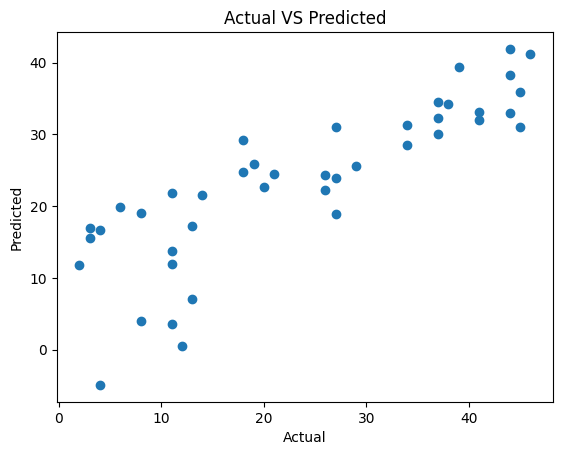

In [2394]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual VS Predicted")
plt.show()

# **Future Prediction**

In [2395]:
X_new = Servo.sample(1)

In [2396]:
X_new

,Motor,Screw,Pgain,Vgain,Class
165,0,1,3,2,44


In [2397]:
X_new= X_new.drop('Class', axis=1)

In [2398]:
X_new

,Motor,Screw,Pgain,Vgain
165,0,1,3,2


In [2399]:
X_new.shape

(1, 4)

In [2400]:
y_pred_new = model.predict(X_new)   # here we definr model.predict,because we define model = LinearRegression, but if we define it like lr = LinearRegression, than we can use  y_pred_new = lr.predict(X_new).

In [2401]:
y_pred_new

array([41.9215261])